In [427]:
# Imports

# Basics
import pandas as pd
import numpy as np
# Pipeline
from sklearn.pipeline import Pipeline
# Scaler
from sklearn.preprocessing import MinMaxScaler
# Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# Feature Selector
from sklearn.feature_selection import SequentialFeatureSelector
# Cross Validation
from sklearn.model_selection import cross_val_score
# Matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Einlesen der Daten

## Mit tsfresh extrahierte Daten

#### Trainingsdaten für die Selektion mit Forward Selection

In [27]:
X_train_extracted_min = pd.read_csv('../data/Features/wood_plastic/features_zum_tranieren/tsfresh_extracted_mini.csv', sep=',')
y_train_extracted_min = pd.read_csv('../data/Features/wood_plastic/features_zum_tranieren/wood_plastic_measurements_train.csv', sep=',')['material']
X_train_extracted_com = pd.read_csv('../data/Features/wood_plastic/features_zum_tranieren/tsfresh_extracted_compreh.csv', sep=',')
y_train = y_train_extracted_min

#### Testdaten für die Selektion mit Backward Elimination

In [28]:
X_test_extracted_min = pd.read_csv('../data/Features/wood_plastic/features_zum_testen/tsfresh_extracted_mini.csv', sep=',')
y_test_extracted_min = pd.read_csv('../data/Features/wood_plastic/features_zum_testen/wood_plastic_measurements_test.csv', sep=',')['material']
X_test_extracted_com =  pd.read_csv('../data/Features/wood_plastic/features_zum_testen/tsfresh_extracted_compreh.csv', sep=',')
y_test = y_test_extracted_min

### Selektierte Features zum einfachen Aufrufen

In [4]:
X_train_extracted_com_forward = pd.read_csv('../data/Features/FeatureAnalysisSelections/wood_plastic/Train/10X_train_com_forward.csv ', sep=',')
X_train_extracted_com_backward = pd.read_csv('../data/Features/FeatureAnalysisSelections/wood_plastic/Train/10X_train_com_backward.csv', sep=',')
X_train_extracted_com_tsfresh = pd.read_csv('../data/Features/wood_plastic/features_zum_tranieren/tsfresh_com_10Features.csv', sep=',')

In [3]:
# Eventuelle Löschung der ersten Spalte namens 'Unnamed' mit 0 Werten

# X_train_extracted_com_forward.drop(columns= "Unnamed: 0", inplace=True)
# X_train_extracted_com_backward.drop(columns= "Unnamed: 0", inplace=True)

### Entfernen der inhaltslosen und wiederholender Merkmale

In [ ]:
X_train_extracted_min_ISUNIQUE = X_train_extracted_min
X_train_extracted_com_ISUNIQUE = X_train_extracted_com
X_train_extracted_min = X_train_extracted_min.loc[:, X_train_extracted_min_ISUNIQUE.nunique() > 1]
X_train_extracted_com = X_train_extracted_com.loc[:, X_train_extracted_com_ISUNIQUE.nunique() > 1]
X_test_extracted_min = X_test_extracted_min.loc[:, X_train_extracted_min_ISUNIQUE.nunique() > 1]
X_test_extracted_com = X_test_extracted_com.loc[:, X_train_extracted_com_ISUNIQUE.nunique() > 1]

Zielordner: (Welche Materialien wurden gebohrt? Nur Plastik und Holz oder auch Metall etc.?)

In [5]:
targetDir = '../data/Features/FeatureAnalysisSelections/wood_plastic/'

## Sequential Forward Selection

In [9]:
RANDOM_STATE = 7
nfeatures = 10
direct = 'forward'
jobs = -1
cross_v = None

### MinimalFCParameters

In [ ]:
forwardSelection_min = SequentialFeatureSelector(estimator = DecisionTreeClassifier(random_state= RANDOM_STATE), n_features_to_select=nfeatures , direction=direct, n_jobs=jobs, cv = cross_v)

##### Selektion der gewählten Features aus den extrahierten und eingelesenen Merkmale

In [ ]:
forwardSelection_min.fit(X_train_extracted_min, y_train_extracted_min)
X_train_extracted_min_forward = forwardSelection_min.transform(X_train_extracted_min)
X_test_extracted_min_forward = forwardSelection_min.transform(X_test_extracted_min) 

##### Aussortieren und Speichern der selektierten Merkmale

In [ ]:
X_train_extracted_min[X_train_extracted_min.columns[forwardSelection_min.get_support()]].to_csv(targetDir+"Train/" + str(nfeatures) + "X_train_min_forward.csv")
X_test_extracted_min[X_test_extracted_min.columns[forwardSelection_min.get_support()]].to_csv(targetDir+"Test/"+ str(nfeatures)+"X_test_min_forward.csv")

### ComprehensiveFCParameters

In [ ]:
forwardSelection_com = SequentialFeatureSelector(estimator = DecisionTreeClassifier(random_state=RANDOM_STATE), n_features_to_select=nfeatures ,  direction=direct, n_jobs=jobs)

##### Selektion der gewählten Features aus den extrahierten und eingelesenen Merkmale

In [ ]:
forwardSelection_com.fit(X_train_extracted_com, y_train)
X_train_extracted_com_forward = forwardSelection_com.transform(X_train_extracted_com)
X_test_extracted_com_forward = forwardSelection_com.transform(X_test_extracted_com) 

##### Aussortieren und Speichern der selektieren der Merkmale

In [ ]:
X_train_extracted_com[X_train_extracted_com.columns[forwardSelection_com.get_support()]].to_csv(targetDir+"Train/"+ str(nfeatures)+"X_train_com_forward.csv")
X_test_extracted_com[X_test_extracted_com.columns[forwardSelection_com.get_support()]].to_csv(targetDir+"Test/"+ str(nfeatures)+"X_test_com_forward.csv")

## Sequential Backward Elimination

In [10]:
RANDOM_STATE = 7
nfeatures = 10
direct = 'backward'
jobs = -1
cross_v = None

### MinimalFCParameters

In [ ]:
backwardSelection_min = SequentialFeatureSelector(estimator = DecisionTreeClassifier(random_state= RANDOM_STATE), n_features_to_select=nfeatures , direction=direct, n_jobs=jobs, cv = cross_v)

##### Selektion der gewählten Features aus den extrahierten und eingelesenen Merkmale

In [ ]:
backwardSelection_min.fit(X_train_extracted_min, y_train)
X_train_extracted_min_backward = backwardSelection_min.transform(X_train_extracted_min)
X_test_extracted_min_backward = backwardSelection_min.transform(X_test_extracted_min) 

##### Aussortieren und Speichern der selektierten Merkmale

In [ ]:
X_train_extracted_min[X_train_extracted_min.columns[backwardSelection_min.get_support()]].to_csv(targetDir+"Train/"+ str(nfeatures)+"X_train_min_backward.csv")
X_test_extracted_min[X_test_extracted_min.columns[backwardSelection_min.get_support()]].to_csv(targetDir+"Test/"+ str(nfeatures)+"X_test_min_backward.csv")

### ComprehensiveFCParameters

In [ ]:
backwardSelection_com = SequentialFeatureSelector(estimator = DecisionTreeClassifier(random_state= RANDOM_STATE), n_features_to_select=nfeatures ,  direction=direct, n_jobs=jobs)

##### Selektion der gewählten Features aus den extrahierten und eingelesenen Merkmale

In [ ]:
backwardSelection_com.fit(X_train_extracted_com, y_train)
X_train_extracted_com_backward = backwardSelection_com.transform(X_train_extracted_com)
X_test_extracted_com_backward = backwardSelection_com.transform(X_test_extracted_com) 

##### Aussortieren und Speichern der selektierten Merkmale

In [ ]:
X_train_extracted_com[X_train_extracted_com.columns[backwardSelection_com.get_support()]].to_csv(targetDir+"Train/"+ str(nfeatures)+"X_train_com_backward.csv")
X_test_extracted_com[X_test_extracted_com.columns[backwardSelection_com.get_support()]].to_csv(targetDir+"Test/"+ str(nfeatures)+"X_test_com_backward.csv")

## Tsfresh

### MinimalFCParameters

In [ ]:
X_train_extracted_min_tsfresh = pd.read_csv('../data/Features/wood_plastic/features_zum_tranieren/tsfresh_mini_10Features.csv', sep=',')
X_test_extracted_min_tsfresh = pd.read_csv('../data/Features/wood_plastic/features_zum_testen/tsfresh_mini_10Features.csv', sep=',')

### ComprehensiveFCParameters

In [ ]:
X_train_extracted_com_tsfresh = pd.read_csv('../data/Features/wood_plastic/features_zum_tranieren/tsfresh_com_10Features.csv', sep=',')
X_test_extracted_com_tsfresh = pd.read_csv('../data/Features/wood_plastic/features_zum_testen/tsfresh_com_10Features.csv', sep=',')

## Pipelines

In [65]:
pipelines = []

# Decision Tree Classifier
pipelines += [(Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=42))  
]), "decision tree")]

# Random Forest Classifier
pipelines += [(Pipeline([  
    ('classifier', RandomForestClassifier(random_state=42))  
]),"random forest")]

# kNN Classifier
pipelines += [(Pipeline([
    ('scaler', MinMaxScaler()),  
    ('classifier', KNeighborsClassifier()),
]),"knn")]

## Funktion zur Untersuchung der bestimmten Merkmale

In [465]:
def analyse_features(X_train, y_train_feat) -> list:
    accuracies = []
    
    for pipeline, name in pipelines:
        scores = cross_val_score(pipeline, X_train, y_train_feat, cv = 5)
        print(name + ':')
        print(scores.round(4))
        accuracies.append([name, scores.mean().round(4)])
    
    return accuracies

### Aufrufe der Funktion 'analyse_features'

In [105]:
X_train_extracted_com_forward = pd.read_csv('../data/Features/FeatureAnalysisSelections/wood_plastic/Train/10X_train_com_forward.csv ', sep=',')
X_train_extracted_com_backward = pd.read_csv('../data/Features/FeatureAnalysisSelections/wood_plastic/Train/10X_train_com_backward.csv', sep=',')
X_train_extracted_com_tsfresh = pd.read_csv('../data/Features/wood_plastic/features_zum_tranieren/tsfresh_com_10Features.csv', sep=',')
X_train_extracted_min_forward = pd.read_csv('../data/Features/FeatureAnalysisSelections/wood_plastic/Train/10X_train_min_forward.csv ', sep=',')
X_train_extracted_min_backward = pd.read_csv('../data/Features/FeatureAnalysisSelections/wood_plastic/Train/10X_train_min_backward.csv', sep=',')
X_train_extracted_min_tsfresh = pd.read_csv('../data/Features/wood_plastic/features_zum_tranieren/tsfresh_mini_10Features.csv', sep=',')

In [392]:
# Einlesen der 10 best Comprehensive Feratures die mit Backward Elimination selektiert wurden
X_test = pd.read_csv('../data/Features/FeatureAnalysisSelections/wood_plastic/Test/10X_test_com_backward.csv', sep = ',')

In [396]:
# X_train_extracted_com_forward.drop(columns= "Unnamed: 0", inplace=True)
# X_train_extracted_com_backward.drop(columns= "Unnamed: 0", inplace=True)
# X_train_extracted_min_forward.drop(columns= "Unnamed: 0", inplace=True)
# X_train_extracted_min_backward.drop(columns= "Unnamed: 0", inplace=True)
# X_test.drop(columns= "Unnamed: 0", inplace=True)


#### Features der Forward Selection

In [466]:
comprehensive_forward = analyse_features(X_train_extracted_com_forward, y_train)

decision tree:
[0.9091 0.8182 0.9091 1.     0.9   ]
random forest:
[0.9091 0.8182 0.9091 1.     0.7   ]
knn:
[0.9091 0.5455 0.5455 0.8182 0.8   ]


In [108]:
comprehensive_forward

[['decision tree', 0.9073], ['random forest', 0.8673], ['knn', 0.7236]]

In [109]:
minimal_forward = analyse_features(X_train_extracted_min_forward, y_train)

decision tree:
[1.     0.8182 0.7273 0.9091 0.9   ]
random forest:
[0.9091 0.9091 0.6364 0.8182 0.9   ]
knn:
[0.8182 0.7273 0.5455 0.8182 0.9   ]


In [110]:
minimal_forward

[['decision tree', 0.8709], ['random forest', 0.8345], ['knn', 0.7618]]

#### Features der Backward Elimination

In [111]:
comprehensive_backward = analyse_features(X_train_extracted_com_backward, y_train)

decision tree:
[1.     1.     0.9091 1.     0.7   ]
random forest:
[1.     1.     0.8182 1.     0.9   ]
knn:
[0.6364 0.6364 0.6364 0.8182 0.5   ]


In [112]:
comprehensive_backward

[['decision tree', 0.9218], ['random forest', 0.9436], ['knn', 0.6455]]

In [113]:
minimal_backward = analyse_features(X_train_extracted_min_backward, y_train)

decision tree:
[0.8182 0.8182 0.8182 0.9091 0.8   ]
random forest:
[0.8182 0.9091 0.5455 0.9091 0.9   ]
knn:
[0.8182 0.7273 0.4545 0.9091 0.6   ]


In [114]:
minimal_backward

[['decision tree', 0.8327], ['random forest', 0.8164], ['knn', 0.7018]]

#### Features des tsfresh

In [115]:
comprehensive_tsfresh = analyse_features(X_train_extracted_com_tsfresh, y_train)

decision tree:
[0.9091 1.     0.7273 0.9091 0.6   ]
random forest:
[0.9091 0.7273 0.7273 1.     0.6   ]
knn:
[0.9091 0.6364 0.8182 0.9091 0.8   ]


In [116]:
comprehensive_tsfresh

[['decision tree', 0.8291], ['random forest', 0.7927], ['knn', 0.8145]]

In [117]:
minimal_tsfresh = analyse_features(X_train_extracted_min_tsfresh, y_train)

decision tree:
[0.5455 0.7273 0.6364 1.     0.5   ]
random forest:
[0.9091 0.8182 0.6364 0.9091 0.8   ]
knn:
[0.7273 0.6364 0.6364 0.9091 0.5   ]


In [118]:
minimal_tsfresh

[['decision tree', 0.6818], ['random forest', 0.8145], ['knn', 0.6818]]

## Plotten der Klassifikationsgenauigkeiten

In [243]:
def plot_scores(title, comprehensive, minimal):
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(9, 5)
    fig.suptitle(title)


    for clf in comprehensive:
        axs[0].bar(clf[0], clf[1], width=0.4, color='skyblue', align='center')
        axs[0].set_xlabel('Modelle')
        axs[0].set_ylabel('Klassifikationsgenauigkeit in %')
        axs[0].set_title('ComprehensiveFCParameters')
        axs[0].set_ylim(ymax = 1.0)
        bars = axs[0].bar(clf[0], clf[1], width=0.3, color='skyblue', align='center') 
        for bar in bars:
            yval = bar.get_height()
            axs[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')


    for clf in minimal:
        axs[1].bar(clf[0], clf[1], width=0.4, color='lightpink')
        axs[1].set_xlabel('Modelle')
        axs[1].set_ylabel('Klassifikationsgenauigkeit in %')
        axs[1].set_title('MinimalFCParameters')
        axs[1].set_ylim(ymax = 1.0)
        bars = axs[0].bar(clf[0], clf[1], width=0.3, color='skyblue', align='center') 
        for bar in bars:
            yval = bar.get_height()
            axs[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

    plt.show()

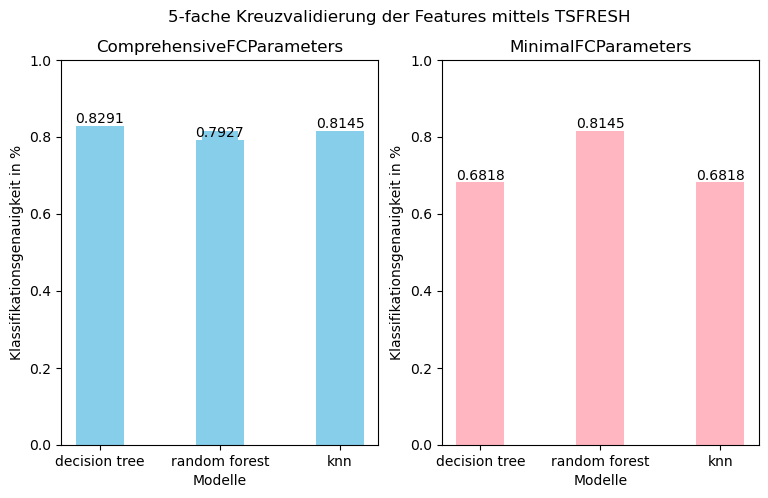

In [322]:
plot_scores('5-fache Kreuzvalidierung der Features mittels TSFRESH', comprehensive_tsfresh, minimal_tsfresh)

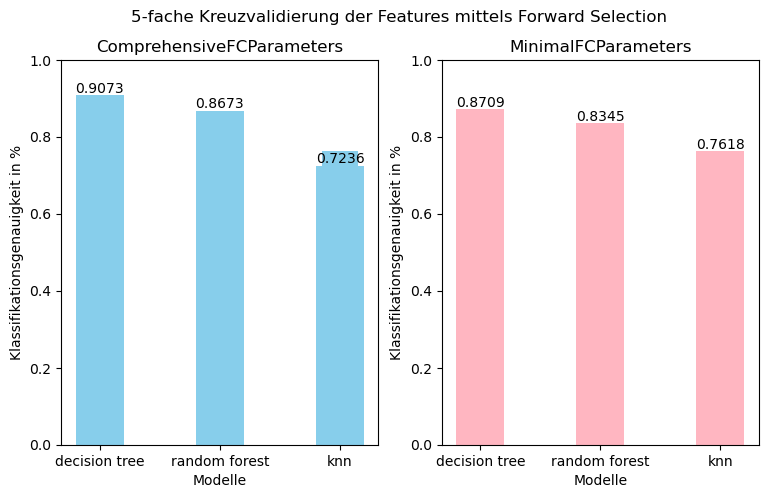

In [323]:
plot_scores('5-fache Kreuzvalidierung der Features mittels Forward Selection', comprehensive_forward, minimal_forward)

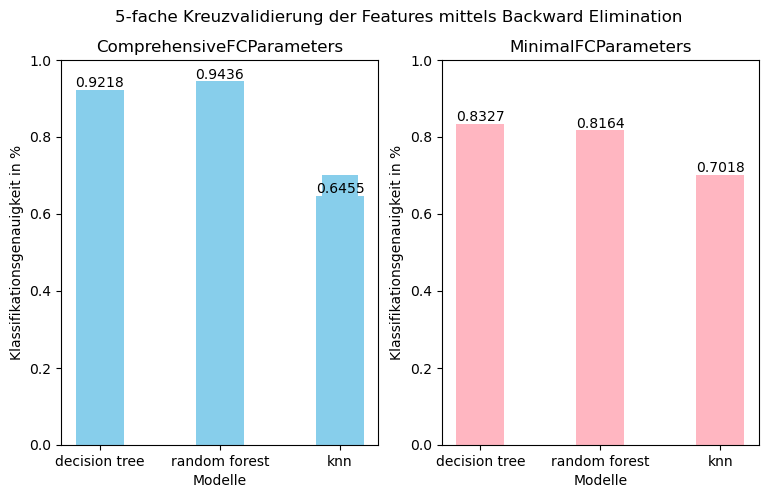

In [324]:
plot_scores('5-fache Kreuzvalidierung der Features mittels Backward Elimination', comprehensive_backward, minimal_backward)

In [379]:
def total_plot(title, comp_back, comp_for, comp_ts, mini_back, mini_for, mini_ts):
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(12, 8)
    fig.suptitle(title)

    comprehensive = [comp_back, comp_for, comp_ts]
    minimal = [mini_back, mini_for, mini_ts]
    
    classifiers = ('Decision Tree', 'Random Forest', 'kNN')
    colors = ['steelblue','mediumseagreen', 'palevioletred']
    acc_comp = []
    acc_mini = []

    for selector in comprehensive:
        for clf in selector:
            acc_comp.append(clf[1])

    back_tup = tuple(acc_comp[:3])
    for_tup = tuple(acc_comp[3:6])
    ts_tup = tuple(acc_comp[6:])

    selectors = {
        'Backward Elimination' : back_tup,
        'Forward Selection' : for_tup,
        'Tsfresh' : ts_tup
    }

    x = np.arange(len(classifiers))
    bar_width = 0.3
    multiplier = 0
    i = 0


    for clf, accuracy in selectors.items():
        offset = 0.3 * multiplier
        bars = axs[0].bar(x + offset, accuracy, width = bar_width, label = clf, color = colors[i])
        axs[0].bar_label(bars, padding=3)
        multiplier += 1
        i += 1

#---------------------------------------------------------------
    for selector in minimal:
        for clf in selector:
            acc_mini.append(clf[1])

    back_tup = tuple(acc_mini[:3])
    for_tup = tuple(acc_mini[3:6])
    ts_tup = tuple(acc_mini[6:])

    selectors = {
        'Backward Elimination' : back_tup,
        'Forward Selection' : for_tup,
        'Tsfresh' : ts_tup
    }

    
    multiplier = 0
    i = 0

    for clf, accuracy in selectors.items():
        offset = 0.3 * multiplier
        bars = axs[1].bar(x + offset, accuracy, width = bar_width, label = clf, color = colors[i])
        axs[1].bar_label(bars, padding=2)
        multiplier += 1
        i += 1

    axs[0].set_xlabel('Modelle')
    axs[0].set_ylabel('Klassifikationsgenauigkeit in %')
    axs[0].set_title('ComprehensiveFCParameters')
    axs[0].set_xticks([r + bar_width / 2 for r in range(len(classifiers))])
    axs[0].set_xticklabels(classifiers, ha='center')
    axs[0].set_yticks(np.arange(0, 1.1, 0.1))
    axs[0].set_ylim(ymax = 1.0)

    axs[1].set_xlabel('Modelle')
    axs[1].set_ylabel('Klassifikationsgenauigkeit in %')
    axs[1].set_title('MinimalFCParameters')
    axs[1].set_xticks([r + bar_width / 2 for r in range(len(classifiers))])
    axs[1].set_xticklabels(classifiers, ha='center')
    axs[1].set_yticks(np.arange(0, 1.1, 0.1))
    axs[1].set_ylim(ymax = 1.0)
    axs[1].legend(bbox_to_anchor =(1.5,1), loc = 'upper right', ncols = 1, fontsize = 10)
    
    plt.show()
    

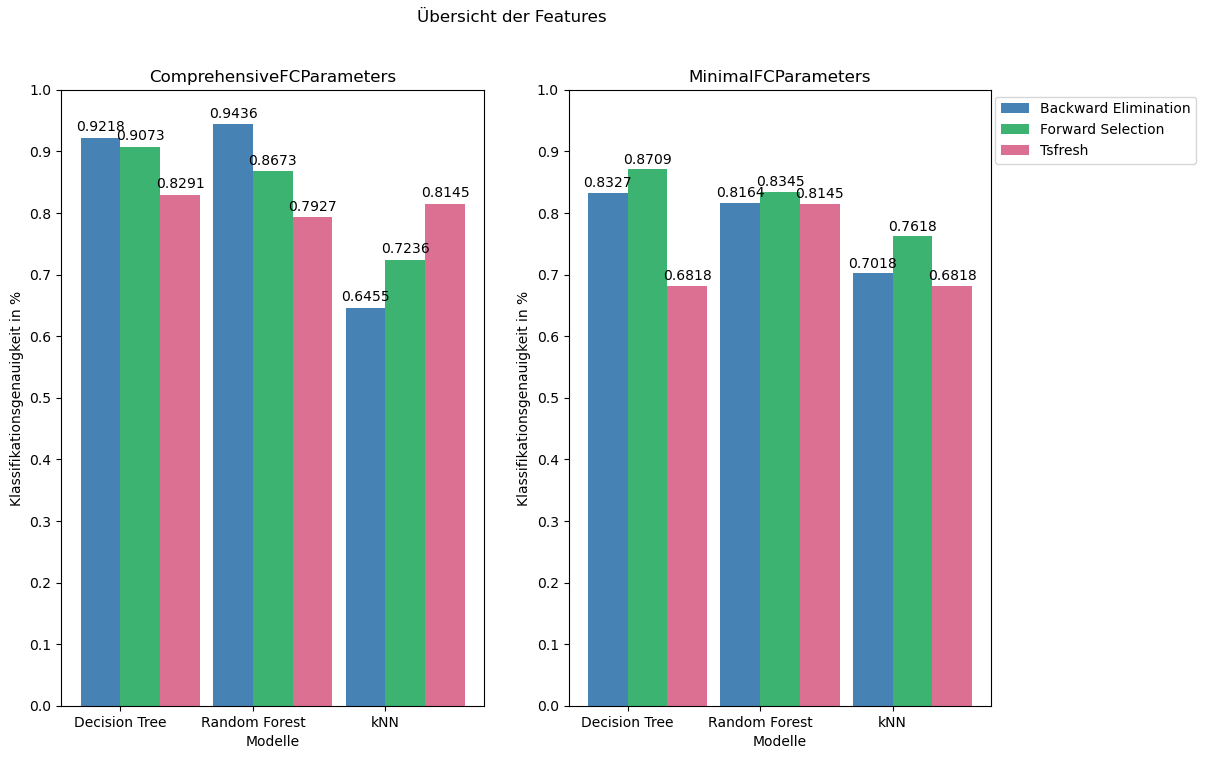

In [380]:
total_plot('Übersicht der Features', comprehensive_backward, comprehensive_forward, comprehensive_tsfresh, minimal_backward, minimal_forward, minimal_tsfresh)

In [463]:
def test_data(pipelines, X_train, y_train, X_Test, y_Test):

    model_acc = []

    for pipeline in pipelines:
        pipeline[0].fit(X_train, y_train)
        y_pred = pipeline[0].predict(X_Test)
        accuracy = accuracy_score(y_Test, y_pred)
        cm = confusion_matrix(y_Test, y_pred)
        model_acc.append([pipeline[1], accuracy])
        print(f'Die Konfusionsmatrix ist gegeben durch {pipeline[1]}: \n{cm}')
    
    return model_acc
        


In [462]:
test_data(pipelines,X_train_extracted_com_backward, y_train, X_test, y_test)


Die Konfusionsmatrix ist gegeben durch decision tree: 
[[3 2]
 [1 4]]
Die Konfusionsmatrix ist gegeben durch random forest: 
[[3 2]
 [1 4]]
Die Konfusionsmatrix ist gegeben durch knn: 
[[3 2]
 [1 4]]


[['decision tree', 0.7], ['random forest', 0.7], ['knn', 0.7]]

In [461]:
# plt.bar(comprehensive_backward[0][0], comprehensive_backward[0][1])
# plt.bar(comprehensive_backward[1][0], comprehensive_backward[1][1])
# plt.bar(comprehensive_backward[2][0], comprehensive_backward[2][1])
# plt.bar(test_res[0][0], test_res[0][1])
# plt.bar(test_res[1][0], test_res[1][1])
# plt.bar(test_res[2][0], test_res[2][1])
# plt.title('Comprehensive-Backward')